This page has been moved to [https://econ.pages.code.wm.edu/414/syllabus/docs/index.html](https://econ.pages.code.wm.edu/407/notes/docs/index.html) and is no longer being maintained here.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib

# Introduction to Pandas

Pandas works hand-in-hand with other python libraries (e.g. matplotlib and numpy) to make manipulating data (what the Pandas team calls "Data Munging") easy.  With pandas it is easy to  

1. Easily access data using variable names, but have full linear algebra capabilities of numpy
2. Group data by values (for example, calculate the mean income by state)
3. Plot and summarize values
4. Join (combine) different sources of data
5. Powerful time series and panel data capabilities (beyond scope of course)

Note: If you want to reinforce some of these concepts on your own, I recommend this superb youtube video (https://www.youtube.com/watch?v=5JnMutdy6Fw) and accompanying coursework (https://github.com/brandon-rhodes/pycon-pandas-tutorial) by Brandon Rhodes.

There are numerous ways to get data into Pandas:

* Import excel and comma delimited data
* Import stata, sas, matlab, and other datasets
* Import data from an SQL server
* Import data scraped from the web
* Manually building (by typing in values)

In this tutorial we will focus on the first two methods for reading data, but just know that there is probably a way to get your data into pandas irrespective of what format it is in.

## Loading and Cleaning Data

We will be loading 2010 "Trip" data from the NOAA Fisheries Service Recreational Fisheries Statistics Survey (called MRIP).  More detail here: https://www.fisheries.noaa.gov/topic/recreational-fishing-data

We will also load the Census Bureau's county and state fips file, obtained here: https://www.census.gov/2010census/xls/fips_codes_website.xls

The MRIPs data needs to be downloaded from my website (you only need to do this once).

In [2]:
# run this once and then comment out with #
# urllib.request.urlretrieve("https://rlhick.people.wm.edu/pubp622/data/mrips_2010.pydata", "mrips_2010.pydata")

In [3]:
trips_2010 = pd.io.pickle.read_pickle('mrips_2010.pydata')
fips = pd.io.excel.read_excel('https://rlhick.people.wm.edu/pubp622/data/fips_codes_website.xls')

In [4]:
trips_2010.head()

index  add_hrs add_ph  age area area_nc area_x  art_reef       asg_code  \
0      0      NaN      1  NaN    C              5       NaN  1171020101114   
1      1      NaN      2  NaN    C              5       NaN  1171020101114   
2      2      0.0      1  NaN    C              5       NaN  1171020101116   
3      3      NaN      1  NaN    C              5       NaN  1171020101123   
4      4      NaN      1  NaN    C              5       NaN  1171020101123   

   boat_hrs      ...          time  tourn    tsn1    tsn2  turtle wave  \
0       0.0      ...        1330.0    NaN  167680             NaN  6.0   
1       0.0      ...        1332.0    NaN  167680             NaN  6.0   
2       0.0      ...        1130.0    NaN  168559  167680     NaN  6.0   
3       0.0      ...        1200.0    NaN  167680  168559     NaN  6.0   
4       0.0      ...        1215.0    NaN  167680  168559     NaN  6.0   

         wp_int    year    zip intercept_date  
0   3411.891063  2010.0  06475     2010-11-14  
1   3411.891063  2010.0  06475     2010-11-14  
2  17548.885633  2010.0  06110     2010-11-16  
3   4489.923579  2010.0  06416     2010-11-23  
4   4489.923579  2010.0  06067     2010-11-23  

[5 rows x 80 columns]

Trips is a very big dataset with lots of columns we'll never use.  Let's trim it down:

In [5]:
trips_2010.columns

Index(['index', 'add_hrs', 'add_ph', 'age', 'area', 'area_nc', 'area_x',
       'art_reef', 'asg_code', 'boat_hrs', 'catch', 'celltype', 'cntrbtrs',
       'cnty', 'cnty_res', 'coastal', 'compflag', 'county', 'date1', 'dist',
       'distkeys', 'f_by_p', 'ffdays12', 'ffdays2', 'first', 'fshinsp_a',
       'gear', 'gender', 'hrs_dtd', 'hrsf', 'id_code', 'intsite', 'kod',
       'leader', 'license', 'mode2001', 'mode_asg', 'mode_f', 'mode_fx',
       'monitor', 'month', 'muni_res', 'muni_trp', 'new_list', 'num_fish_a',
       'num_typ2', 'num_typ3', 'num_typ4', 'num_typ6', 'num_typ9', 'on_list',
       'party', 'prim1', 'prim1_common', 'prim2', 'prim2_common', 'prt_code',
       'psu_id', 'pvt_res', 'reefcode', 'reg_res', 'region', 'rig', 'sep_fish',
       'st', 'st_res', 'strat_id', 'strat_interval', 'sub_reg', 'telefon',
       'time', 'tourn', 'tsn1', 'tsn2', 'turtle', 'wave', 'wp_int', 'year',
       'zip', 'intercept_date'],
      dtype='object')

In [6]:
trips = trips_2010[['id_code','year','wave','intercept_date','st','prim1',
                    'prim1_common','prim2','prim2_common','cnty','ffdays12',
                    'ffdays2']]

This is summary statistics for numeric data columns:

In [7]:
trips.describe()

year           wave             st           cnty       ffdays12  \
count  104709.0  104709.000000  104709.000000  104519.000000  104519.000000   
mean     2010.0       3.794879      23.974615      78.798171      40.771439   
std         0.0       1.347586      13.160875     130.751209     122.456004   
min      2010.0       1.000000       1.000000       1.000000       0.000000   
25%      2010.0       3.000000      12.000000      19.000000       1.000000   
50%      2010.0       4.000000      22.000000      55.000000      10.000000   
75%      2010.0       5.000000      37.000000      99.000000      35.000000   
max      2010.0       6.000000      51.000000     810.000000     999.000000   

             ffdays2  
count  104519.000000  
mean        6.191936  
std        13.037239  
min         0.000000  
25%         0.000000  
50%         2.000000  
75%         7.000000  
max        99.000000

### Using Pandas DataFrames

##### Referencing columns in data:

In [8]:
# copy data frame into t (note, this is different than assignment [t=trips])
t=trips.copy()

t.ffdays12.head()

0    25.0
1    10.0
2    12.0
3    90.0
4    75.0
Name: ffdays12, dtype: float64

In [9]:
t['ffdays12'].head()

0    25.0
1    10.0
2    12.0
3    90.0
4    75.0
Name: ffdays12, dtype: float64

##### Referencing rows in data:

We can use numpy-like slicing:

In [10]:
# rows 50-54
t.loc[51:55]

id_code    year  wave intercept_date   st       prim1  \
51  1171020101111005  2010.0   6.0     2010-11-11  9.0  8839010101   
52  1171020101111006  2010.0   6.0     2010-11-11  9.0  8839010101   
53  1171020101113001  2010.0   6.0     2010-11-13  9.0  8839010101   
54  1171020101113002  2010.0   6.0     2010-11-13  9.0  8839010101   
55  1171020101113003  2010.0   6.0     2010-11-13  9.0  8839010101   

   prim1_common prim2 prim2_common  cnty  ffdays12  ffdays2  
51       TAUTOG                      7.0      35.0     10.0  
52       TAUTOG                      7.0      30.0     10.0  
53       TAUTOG                     11.0      10.0      8.0  
54       TAUTOG                     11.0      10.0      8.0  
55       TAUTOG                     11.0       3.0      2.0

In [11]:
# rows 1 and 2 for the first 5 columns
t.iloc[0:2,0:5]

id_code    year  wave intercept_date   st
0  1171020101114001  2010.0   6.0     2010-11-14  9.0
1  1171020101114002  2010.0   6.0     2010-11-14  9.0

We can select rows of data based on column values.  Let's select all the rows where st is 9 (Connecticut)

In [12]:
t[t.st == 9].head()

id_code    year  wave intercept_date   st       prim1  \
0  1171020101114001  2010.0   6.0     2010-11-14  9.0  8835020102   
1  1171020101114002  2010.0   6.0     2010-11-14  9.0  8835020102   
2  1171020101116001  2010.0   6.0     2010-11-16  9.0  8835250101   
3  1171020101123001  2010.0   6.0     2010-11-23  9.0  8835020102   
4  1171020101123002  2010.0   6.0     2010-11-23  9.0  8835020102   

   prim1_common       prim2  prim2_common  cnty  ffdays12  ffdays2  
0  STRIPED BASS                             7.0      25.0      5.0  
1  STRIPED BASS                             7.0      10.0      2.0  
2      BLUEFISH  8835020102  STRIPED BASS  11.0      12.0      6.0  
3  STRIPED BASS  8835250101      BLUEFISH   7.0      90.0     25.0  
4  STRIPED BASS  8835250101      BLUEFISH   7.0      75.0     20.0

Find all rows where days spent fishing during past 12 months exceeds 10:

In [13]:
t[t.ffdays12>10].head()

id_code    year  wave intercept_date   st       prim1  \
0  1171020101114001  2010.0   6.0     2010-11-14  9.0  8835020102   
2  1171020101116001  2010.0   6.0     2010-11-16  9.0  8835250101   
3  1171020101123001  2010.0   6.0     2010-11-23  9.0  8835020102   
4  1171020101123002  2010.0   6.0     2010-11-23  9.0  8835020102   
5  1171020101123003  2010.0   6.0     2010-11-23  9.0  8835020102   

   prim1_common       prim2  prim2_common  cnty  ffdays12  ffdays2  
0  STRIPED BASS                             7.0      25.0      5.0  
2      BLUEFISH  8835020102  STRIPED BASS  11.0      12.0      6.0  
3  STRIPED BASS  8835250101      BLUEFISH   7.0      90.0     25.0  
4  STRIPED BASS  8835250101      BLUEFISH   7.0      75.0     20.0  
5  STRIPED BASS  8835250101      BLUEFISH   7.0      70.0     10.0

##### Math on columns: 

In [14]:
# we can create a new variable and use numpy commands:
t['temp'] = t.ffdays12 + .5*np.random.randn(t.shape[0])
t.head()

id_code    year  wave intercept_date   st       prim1  \
0  1171020101114001  2010.0   6.0     2010-11-14  9.0  8835020102   
1  1171020101114002  2010.0   6.0     2010-11-14  9.0  8835020102   
2  1171020101116001  2010.0   6.0     2010-11-16  9.0  8835250101   
3  1171020101123001  2010.0   6.0     2010-11-23  9.0  8835020102   
4  1171020101123002  2010.0   6.0     2010-11-23  9.0  8835020102   

   prim1_common       prim2  prim2_common  cnty  ffdays12  ffdays2       temp  
0  STRIPED BASS                             7.0      25.0      5.0  24.981628  
1  STRIPED BASS                             7.0      10.0      2.0   9.281947  
2      BLUEFISH  8835020102  STRIPED BASS  11.0      12.0      6.0  11.958769  
3  STRIPED BASS  8835250101      BLUEFISH   7.0      90.0     25.0  90.170897  
4  STRIPED BASS  8835250101      BLUEFISH   7.0      75.0     20.0  75.427539

In [15]:
t.temp.mean()

40.76974409766304

In [16]:
# or we could do this all in one step if we didn't want to create a new column in t:
(t.ffdays12 + .5*np.random.randn(t.shape[0])).mean()

40.77151062295116

Note: You can combine pandas with numpy. This is the standard deviation of the column `ffdays12`:  

In [17]:
np.std(t.ffdays12)

122.45541845299698

We can perform matrix/vector operations on pandas data.

Here, we can transpose a slice of the data: 

In [18]:
t[['ffdays12','ffdays2']].head(10).T

0     1     2     3     4     5     6     7    8      9
ffdays12  25.0  10.0  12.0  90.0  75.0  70.0  10.0  15.0  1.0  250.0
ffdays2    5.0   2.0   6.0  25.0  20.0  10.0   2.0   0.0  0.0   50.0

We can do matrix multiplication:

In [19]:
np.dot(t[['ffdays12','ffdays2']].head(10).T,t[['ffdays12','ffdays2']].head(10))

array([[82320., 17187.],
       [17187.,  3694.]])

# Note: the remainder of this notebook is not particularly relevant for Bayesian Econometrics

While we won't use it in our course, you may find the following very useful for data munging.


#### Summary Statistics

Find mean of ffdays12 and ffdays2

In [20]:
t[['ffdays12','ffdays2']].describe()

ffdays12        ffdays2
count  104519.000000  104519.000000
mean       40.771439       6.191936
std       122.456004      13.037239
min         0.000000       0.000000
25%         1.000000       0.000000
50%        10.000000       2.000000
75%        35.000000       7.000000
max       999.000000      99.000000

Find mean of ffdays12 and ffdays2 by state:

In [21]:
t.head()

id_code    year  wave intercept_date   st       prim1  \
0  1171020101114001  2010.0   6.0     2010-11-14  9.0  8835020102   
1  1171020101114002  2010.0   6.0     2010-11-14  9.0  8835020102   
2  1171020101116001  2010.0   6.0     2010-11-16  9.0  8835250101   
3  1171020101123001  2010.0   6.0     2010-11-23  9.0  8835020102   
4  1171020101123002  2010.0   6.0     2010-11-23  9.0  8835020102   

   prim1_common       prim2  prim2_common  cnty  ffdays12  ffdays2       temp  
0  STRIPED BASS                             7.0      25.0      5.0  24.981628  
1  STRIPED BASS                             7.0      10.0      2.0   9.281947  
2      BLUEFISH  8835020102  STRIPED BASS  11.0      12.0      6.0  11.958769  
3  STRIPED BASS  8835250101      BLUEFISH   7.0      90.0     25.0  90.170897  
4  STRIPED BASS  8835250101      BLUEFISH   7.0      75.0     20.0  75.427539

In [22]:
t[['ffdays12','ffdays2']].groupby('st').describe()

KeyError: 'st'

What happened?  We trimmed down the columns of t with the statement `t[['ffdays12','ffdays2']]` and pandas couldn't find the columns `st`.  Let's try this again:

In [23]:
t.groupby('st')[['ffdays12','ffdays2']].describe()

ffdays12                                                        ffdays2  \
        count       mean         std  min   25%   50%    75%    max    count   
st                                                                             
1.0    2319.0  54.470030  173.295166  0.0  1.00   8.0  30.00  998.0   2319.0   
9.0    2068.0  19.050774   45.799724  0.0  0.75   5.0  20.00  998.0   2068.0   
10.0   3691.0  33.415335  126.399327  0.0  1.00   6.0  20.00  999.0   3691.0   
12.0  37354.0  59.632543  154.875664  0.0  2.00  20.0  50.00  999.0  37354.0   
13.0   1725.0  17.682899   34.627497  0.0  0.00   3.0  24.00  360.0   1725.0   
22.0   5212.0  23.146201   53.764561  0.0  3.00  10.0  25.00  998.0   5212.0   
23.0   1440.0  25.009028  112.346057  0.0  0.00   2.0  13.00  998.0   1440.0   
24.0   4163.0  22.875811   91.202939  0.0  1.00   4.0  16.00  999.0   4163.0   
25.0   4181.0  29.579048  106.879088  0.0  1.00   6.0  24.00  999.0   4181.0   
28.0   1784.0  50.395179   97.010203  0.0  5.00  25.0  50.00  999.0   1784.0   
33.0   2375.0  14.131368   67.848061  0.0  0.00   2.0  10.00  999.0   2375.0   
34.0   4760.0  35.825000  111.351586  0.0  3.00  10.0  30.00  998.0   4760.0   
36.0   3981.0  36.994223  101.657053  0.0  4.00  20.0  40.00  999.0   3981.0   
37.0  20289.0  29.622998   86.518452  0.0  1.00   6.0  25.00  999.0  20289.0   
44.0   1488.0  20.715726   39.349850  0.0  1.00   5.0  20.25  320.0   1488.0   
45.0   2867.0  50.676317  167.737333  0.0  0.00   7.0  30.00  999.0   2867.0   
51.0   4822.0  24.962256   81.259619  0.0  1.00   6.0  25.00  999.0   4822.0   

                                                      
          mean        std  min  25%  50%   75%   max  
st                                                    
1.0   5.535576  11.381926  0.0  0.0  2.0   6.0  98.0  
9.0   4.711315   8.832107  0.0  0.0  2.0   6.0  98.0  
10.0  5.167163  13.028735  0.0  0.0  1.0   5.0  99.0  
12.0  7.921401  15.925836  0.0  0.0  3.0   8.0  99.0  
13.0  3.355362   6.087584  0.0  0.0  1.0   4.0  60.0  
22.0  3.582502   6.558266  0.0  0.0  2.0   4.0  98.0  
23.0  4.971528  12.479304  0.0  0.0  0.0   4.0  98.0  
24.0  4.357915  10.796496  0.0  0.0  1.0   4.0  99.0  
25.0  5.560871  12.220832  0.0  0.0  1.0   6.0  99.0  
28.0  6.431054  11.731276  0.0  0.0  3.0   8.0  99.0  
33.0  3.124632   8.231361  0.0  0.0  0.0   3.0  99.0  
34.0  6.005042  11.223230  0.0  0.0  2.0   7.0  99.0  
36.0  7.949510  12.562636  0.0  1.0  4.0  10.0  99.0  
37.0  5.417418  10.735914  0.0  0.0  2.0   6.0  99.0  
44.0  4.751344   9.322511  0.0  0.0  1.0   5.0  60.0  
45.0  7.040112  17.099136  0.0  0.0  2.0   6.0  99.0  
51.0  4.214641   8.909940  0.0  0.0  1.0   5.0  98.0

## Combining DataFrames

The state fips codes are hardly intuitive and even worse for the county fips codes.  The goal of this section is to 

1. Add text-based labels
2. Be able to use these labels for fast data selection

To do this, we will attempt to match text based state and county labels to our trips dataframe.  Pandas calls this a merge.

In [24]:
fips.head()

State Abbreviation  State FIPS Code  County FIPS Code  FIPS Entity Code  \
0                 AL                1                67               124   
1                 AL                1                73               460   
2                 AL                1               117               820   
3                 AL                1                95               988   
4                 AL                1               123              1132   

   ANSI Code         GU Name Entity Description  
0    2403054       Abbeville               city  
1    2403063      Adamsville               city  
2    2403069       Alabaster               city  
3    2403074     Albertville               city  
4    2403077  Alexander City               city

The fips codes (numeric) uniquely identify counties in our trips file.  So let's look at the fips file (that we grabbed from Census) above and combine it with our trips data.  These column names are messy: let's clean it up.

For me, column names should always:
1. Be lower case
2. Have no spaces or funky characters

In [25]:
names = ['state','state_fips','county_fips','fips','ansi_code',
         'county_name','entity_type']
fips.columns=names
fips.head()

state  state_fips  county_fips  fips  ansi_code     county_name entity_type
0    AL           1           67   124    2403054       Abbeville        city
1    AL           1           73   460    2403063      Adamsville        city
2    AL           1          117   820    2403069       Alabaster        city
3    AL           1           95   988    2403074     Albertville        city
4    AL           1          123  1132    2403077  Alexander City        city

The merge statement takes two pandas dataframes and combines them.  Notice in the merge command below we have trips,fips.  The dataframe trips is known as the "left" dataframe and fips, the "right".  I want to combine these columns based on the numeric fips values (state and county).  These fields have different names in each of the dataframes, so I need to specify the names (in the same order) for the left (trips) and right (fips) dataframes.  The option `how='left'` tells pandas to always keep rows from trips whether a match is made with fips or not.  Note that if a row in the fips table doesn't match our trips data, it is discarded.

In [26]:
# join clean fips codes to data_trip
trips_fips = pd.merge(trips,fips, left_on=['st','cnty'], 
                      right_on=['state_fips','county_fips'],
      how='left', sort=False)

In [27]:
print(trips.shape)
print(trips_fips.shape)

(104709, 12)
(1561000, 19)


The result we get is disconcerting.  What we wanted to achieve with the merge was to add text names to the trips table, and our merged dataset has 1.5 million rows rather than 104,709 (what we want).  This probably occured because there were duplicate (or redundant information on fips codes in the fips table).  To check that use the `duplicate` method to find rows with duplicate state and county fips codes.

In [28]:
fips[fips.duplicated(['state_fips','county_fips'])]['entity_type'].value_counts().head(20)

township              12641
city                   8355
town                   8136
village                3974
County                 2555
borough                1136
Reservation             438
ANVSA                   221
CDP                     147
comunidad               124
OTSA                    101
zona urbana              79
charter township         78
Hawaiian Home Land       75
Municipio                58
SDTSA                    53
Rancheria                47
Parish                   38
Indian Reservation       36
Township                 35
Name: entity_type, dtype: int64

Unfortunately, this file is (apparently) for census workers in the field who may encounter lots of different place names, and this file helps their data-entry program map into the correct state and county fips codes.  This isn't ideal for our purposes.  Since our trips table already has the correct numeric fips codes, we need a fips table that has the correct and **unique** county/city names.

Grab another fips table from here: https://www.census.gov/geo/reference/codes/cou.html and choose United States.

For convenience, I'll save to my website.

In [29]:
fips = pd.io.parsers.read_csv('https://rlhick.people.wm.edu/pubp622/data/national_county.txt',
                              header=None, names=['state','state_fips','county_fips','county','fips_class_code'])
print(fips.shape)

(3235, 5)


In [30]:
fips.head()

state  state_fips  county_fips          county fips_class_code
0    AL           1            1  Autauga County              H1
1    AL           1            3  Baldwin County              H1
2    AL           1            5  Barbour County              H1
3    AL           1            7     Bibb County              H1
4    AL           1            9   Blount County              H1

Having worked with the data before, I know that counties/entities like Virginia Beach City are labeled "Virginia Beach city".  Let's fix that:

In [31]:
fips["county"] = fips.county.str.replace("city","City")

Check for duplicates:

In [32]:
fips.duplicated(['state_fips','county_fips'])
print("Number of duplicate rows:", fips[fips.duplicated(['state_fips','county_fips'])].size)

Number of duplicate rows: 0


In [33]:
trips_fips = pd.merge(trips,fips, left_on=['st','cnty'], 
                      right_on=['state_fips','county_fips'],
                      how='left', sort=False)
print(trips.shape)
print(trips_fips.shape)

(104709, 12)
(104709, 17)


In [34]:
trips_fips.head()

id_code    year  wave intercept_date st       prim1  prim1_common  \
0  1171020101114001  2010.0   6.0     2010-11-14  9  8835020102  STRIPED BASS   
1  1171020101114002  2010.0   6.0     2010-11-14  9  8835020102  STRIPED BASS   
2  1171020101116001  2010.0   6.0     2010-11-16  9  8835250101      BLUEFISH   
3  1171020101123001  2010.0   6.0     2010-11-23  9  8835020102  STRIPED BASS   
4  1171020101123002  2010.0   6.0     2010-11-23  9  8835020102  STRIPED BASS   

        prim2  prim2_common cnty  ffdays12  ffdays2 state  state_fips  \
0                              7      25.0      5.0    CT         9.0   
1                              7      10.0      2.0    CT         9.0   
2  8835020102  STRIPED BASS   11      12.0      6.0    CT         9.0   
3  8835250101      BLUEFISH    7      90.0     25.0    CT         9.0   
4  8835250101      BLUEFISH    7      75.0     20.0    CT         9.0   

   county_fips             county fips_class_code  
0          7.0   Middlesex County              H4  
1          7.0   Middlesex County              H4  
2         11.0  New London County              H4  
3          7.0   Middlesex County              H4  
4          7.0   Middlesex County              H4

Let's rename our state and intercept column to make it more intuitive.

In [35]:
trips_fips.rename(columns = {'county': 'county_intercept','state':'state_intercept'},inplace=True)
trips_fips.head()

id_code    year  wave intercept_date st       prim1  prim1_common  \
0  1171020101114001  2010.0   6.0     2010-11-14  9  8835020102  STRIPED BASS   
1  1171020101114002  2010.0   6.0     2010-11-14  9  8835020102  STRIPED BASS   
2  1171020101116001  2010.0   6.0     2010-11-16  9  8835250101      BLUEFISH   
3  1171020101123001  2010.0   6.0     2010-11-23  9  8835020102  STRIPED BASS   
4  1171020101123002  2010.0   6.0     2010-11-23  9  8835020102  STRIPED BASS   

        prim2  prim2_common cnty  ffdays12  ffdays2 state_intercept  \
0                              7      25.0      5.0              CT   
1                              7      10.0      2.0              CT   
2  8835020102  STRIPED BASS   11      12.0      6.0              CT   
3  8835250101      BLUEFISH    7      90.0     25.0              CT   
4  8835250101      BLUEFISH    7      75.0     20.0              CT   

   state_fips  county_fips   county_intercept fips_class_code  
0         9.0          7.0   Middlesex County              H4  
1         9.0          7.0   Middlesex County              H4  
2         9.0         11.0  New London County              H4  
3         9.0          7.0   Middlesex County              H4  
4         9.0          7.0   Middlesex County              H4

## Working with Indices

Let's create an index on these new state and county fields:

In [36]:
trips_fips.set_index(['state_intercept','county_intercept'],inplace=True)
trips_fips.head()

id_code    year  wave  \
state_intercept county_intercept                                    
CT              Middlesex County   1171020101114001  2010.0   6.0   
                Middlesex County   1171020101114002  2010.0   6.0   
                New London County  1171020101116001  2010.0   6.0   
                Middlesex County   1171020101123001  2010.0   6.0   
                Middlesex County   1171020101123002  2010.0   6.0   

                                  intercept_date st       prim1  prim1_common  \
state_intercept county_intercept                                                
CT              Middlesex County      2010-11-14  9  8835020102  STRIPED BASS   
                Middlesex County      2010-11-14  9  8835020102  STRIPED BASS   
                New London County     2010-11-16  9  8835250101      BLUEFISH   
                Middlesex County      2010-11-23  9  8835020102  STRIPED BASS   
                Middlesex County      2010-11-23  9  8835020102  STRIPED BASS   

                                        prim2  prim2_common cnty  ffdays12  \
state_intercept county_intercept                                             
CT              Middlesex County                               7      25.0   
                Middlesex County                               7      10.0   
                New London County  8835020102  STRIPED BASS   11      12.0   
                Middlesex County   8835250101      BLUEFISH    7      90.0   
                Middlesex County   8835250101      BLUEFISH    7      75.0   

                                   ffdays2  state_fips  county_fips  \
state_intercept county_intercept                                      
CT              Middlesex County       5.0         9.0          7.0   
                Middlesex County       2.0         9.0          7.0   
                New London County      6.0         9.0         11.0   
                Middlesex County      25.0         9.0          7.0   
                Middlesex County      20.0         9.0          7.0   

                                  fips_class_code  
state_intercept county_intercept                   
CT              Middlesex County               H4  
                Middlesex County               H4  
                New London County              H4  
                Middlesex County               H4  
                Middlesex County               H4

Why use an index for these state and county codes?  The biggest reason is that we can easily access values for looking at our data.  Here we have 2 month avidity for anglers sampled in James City County:

In [37]:
trips_fips['ffdays2'].loc['VA','James City County']

/home/robhicks/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


state_intercept  county_intercept 
VA               James City County     2.0
                 James City County     1.0
                 James City County     0.0
                 James City County     0.0
                 James City County     4.0
                 James City County     6.0
                 James City County     6.0
                 James City County     6.0
                 James City County     6.0
                 James City County     3.0
                 James City County     3.0
                 James City County     8.0
                 James City County    20.0
                 James City County     1.0
                 James City County    12.0
                 James City County     2.0
                 James City County     1.0
                 James City County     8.0
                 James City County     0.0
                 James City County     4.0
                 James City County     2.0
                 James City County     2.0
                 Ja

In [38]:
# we want to create a richer index that includes the prim1_common species name:
# 1. put state_intercept and county_intercept back in data
trips_fips.reset_index(inplace=True)
trips_fips.head()
# 2. create new multiindex
trips_fips.set_index(['state_intercept','county_intercept','prim1_common'],inplace=True)

In [39]:
trips_fips.head()

id_code    year  \
state_intercept county_intercept  prim1_common                             
CT              Middlesex County  STRIPED BASS  1171020101114001  2010.0   
                                  STRIPED BASS  1171020101114002  2010.0   
                New London County BLUEFISH      1171020101116001  2010.0   
                Middlesex County  STRIPED BASS  1171020101123001  2010.0   
                                  STRIPED BASS  1171020101123002  2010.0   

                                                wave intercept_date st  \
state_intercept county_intercept  prim1_common                           
CT              Middlesex County  STRIPED BASS   6.0     2010-11-14  9   
                                  STRIPED BASS   6.0     2010-11-14  9   
                New London County BLUEFISH       6.0     2010-11-16  9   
                Middlesex County  STRIPED BASS   6.0     2010-11-23  9   
                                  STRIPED BASS   6.0     2010-11-23  9   

                                                     prim1       prim2  \
state_intercept county_intercept  prim1_common                           
CT              Middlesex County  STRIPED BASS  8835020102               
                                  STRIPED BASS  8835020102               
                New London County BLUEFISH      8835250101  8835020102   
                Middlesex County  STRIPED BASS  8835020102  8835250101   
                                  STRIPED BASS  8835020102  8835250101   

                                                prim2_common cnty  ffdays12  \
state_intercept county_intercept  prim1_common                                
CT              Middlesex County  STRIPED BASS                  7      25.0   
                                  STRIPED BASS                  7      10.0   
                New London County BLUEFISH      STRIPED BASS   11      12.0   
                Middlesex County  STRIPED BASS      BLUEFISH    7      90.0   
                                  STRIPED BASS      BLUEFISH    7      75.0   

                                                ffdays2  state_fips  \
state_intercept county_intercept  prim1_common                        
CT              Middlesex County  STRIPED BASS      5.0         9.0   
                                  STRIPED BASS      2.0         9.0   
                New London County BLUEFISH          6.0         9.0   
                Middlesex County  STRIPED BASS     25.0         9.0   
                                  STRIPED BASS     20.0         9.0   

                                                county_fips fips_class_code  
state_intercept county_intercept  prim1_common                               
CT              Middlesex County  STRIPED BASS          7.0              H4  
                                  STRIPED BASS          7.0              H4  
                New London County BLUEFISH             11.0              H4  
                Middlesex County  STRIPED BASS          7.0              H4  
                                  STRIPED BASS          7.0              H4

In [40]:
trips_fips.loc['VA','Virginia Beach City','RED DRUM'].head()

/home/robhicks/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


id_code    year  \
state_intercept county_intercept    prim1_common                             
VA              Virginia Beach City RED DRUM      1681420101127002  2010.0   
                                    RED DRUM      1681420101127004  2010.0   
                                    RED DRUM      1681420101127005  2010.0   
                                    RED DRUM      1681420101126003  2010.0   
                                    RED DRUM      1681420101126004  2010.0   

                                                  wave intercept_date  st  \
state_intercept county_intercept    prim1_common                            
VA              Virginia Beach City RED DRUM       6.0     2010-11-27  51   
                                    RED DRUM       6.0     2010-11-27  51   
                                    RED DRUM       6.0     2010-11-27  51   
                                    RED DRUM       6.0     2010-11-26  51   
                                    RED DRUM       6.0     2010-11-26  51   

                                                       prim1       prim2  \
state_intercept county_intercept    prim1_common                           
VA              Virginia Beach City RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901  8835250101   
                                    RED DRUM      8835440901  8835440102   
                                    RED DRUM      8835440901               

                                                      prim2_common cnty  \
state_intercept county_intercept    prim1_common                          
VA              Virginia Beach City RED DRUM      SPOTTED SEATROUT  810   
                                    RED DRUM      SPOTTED SEATROUT  810   
                                    RED DRUM              BLUEFISH  810   
                                    RED DRUM      SPOTTED SEATROUT  810   
                                    RED DRUM                        810   

                                                  ffdays12  ffdays2  \
state_intercept county_intercept    prim1_common                      
VA              Virginia Beach City RED DRUM          40.0     10.0   
                                    RED DRUM         150.0     24.0   
                                    RED DRUM          50.0     20.0   
                                    RED DRUM           8.0      4.0   
                                    RED DRUM         150.0     35.0   

                                                  state_fips  county_fips  \
state_intercept county_intercept    prim1_common                            
VA              Virginia Beach City RED DRUM            51.0        810.0   
                                    RED DRUM            51.0        810.0   
                                    RED DRUM            51.0        810.0   
                                    RED DRUM            51.0        810.0   
                                    RED DRUM            51.0        810.0   

                                                 fips_class_code  
state_intercept county_intercept    prim1_common                  
VA              Virginia Beach City RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7  
                                    RED DRUM                  C7

In [41]:
trips_fips.loc['VA',:,'STRIPED BASS'].head()

id_code    year  wave intercept_date  st  \
county_intercept                                                         
Virginia Beach City  1662020101110001  2010.0   6.0     2010-11-10  51   
Virginia Beach City  1662020101110002  2010.0   6.0     2010-11-10  51   
Hampton City         1680820101122001  2010.0   6.0     2010-11-22  51   
Virginia Beach City  1681420101121005  2010.0   6.0     2010-11-21  51   
Virginia Beach City  1681420101121012  2010.0   6.0     2010-11-21  51   

                          prim1       prim2 prim2_common cnty  ffdays12  \
county_intercept                                                          
Virginia Beach City  8835020102                           810      14.0   
Virginia Beach City  8835020102                           810      10.0   
Hampton City         8835020102  8835440901     RED DRUM  650      80.0   
Virginia Beach City  8835020102                           810       4.0   
Virginia Beach City  8835020102                           810       2.0   

                     ffdays2  state_fips  county_fips fips_class_code  
county_intercept                                                       
Virginia Beach City      5.0        51.0        810.0              C7  
Virginia Beach City      5.0        51.0        810.0              C7  
Hampton City            24.0        51.0        650.0              C7  
Virginia Beach City      4.0        51.0        810.0              C7  
Virginia Beach City      0.0        51.0        810.0              C7

Ok, indexes are pretty cool, but what if we need the county data for doing summary statistics?  Example, suppose we want to get a frequency count of trips by county in VA targeting Striped Bass?  Notice, we can't just access index values like you would a column of data:

In [42]:
trips_fips.county_intercept

AttributeError: 'DataFrame' object has no attribute 'county_intercept'

So the strategy will be to copy the index values back into our table so we can use it for other purposes:

(Note: you can also keep these columns in your data by including the option `drop=False` when you `set_index()`)

In [43]:
print(trips_fips.index.get_level_values(0))
trips_fips['state_intercept'] = trips_fips.index.get_level_values(0)
trips_fips['county_intercept'] = trips_fips.index.get_level_values(1)
trips_fips['species_name'] = trips_fips.index.get_level_values(2)

Index(['CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT',
       ...
       'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS'],
      dtype='object', name='state_intercept', length=104709)


In [44]:
trips_fips.head()

id_code    year  \
state_intercept county_intercept  prim1_common                             
CT              Middlesex County  STRIPED BASS  1171020101114001  2010.0   
                                  STRIPED BASS  1171020101114002  2010.0   
                New London County BLUEFISH      1171020101116001  2010.0   
                Middlesex County  STRIPED BASS  1171020101123001  2010.0   
                                  STRIPED BASS  1171020101123002  2010.0   

                                                wave intercept_date st  \
state_intercept county_intercept  prim1_common                           
CT              Middlesex County  STRIPED BASS   6.0     2010-11-14  9   
                                  STRIPED BASS   6.0     2010-11-14  9   
                New London County BLUEFISH       6.0     2010-11-16  9   
                Middlesex County  STRIPED BASS   6.0     2010-11-23  9   
                                  STRIPED BASS   6.0     2010-11-23  9   

                                                     prim1       prim2  \
state_intercept county_intercept  prim1_common                           
CT              Middlesex County  STRIPED BASS  8835020102               
                                  STRIPED BASS  8835020102               
                New London County BLUEFISH      8835250101  8835020102   
                Middlesex County  STRIPED BASS  8835020102  8835250101   
                                  STRIPED BASS  8835020102  8835250101   

                                                prim2_common cnty  ffdays12  \
state_intercept county_intercept  prim1_common                                
CT              Middlesex County  STRIPED BASS                  7      25.0   
                                  STRIPED BASS                  7      10.0   
                New London County BLUEFISH      STRIPED BASS   11      12.0   
                Middlesex County  STRIPED BASS      BLUEFISH    7      90.0   
                                  STRIPED BASS      BLUEFISH    7      75.0   

                                                ffdays2  state_fips  \
state_intercept county_intercept  prim1_common                        
CT              Middlesex County  STRIPED BASS      5.0         9.0   
                                  STRIPED BASS      2.0         9.0   
                New London County BLUEFISH          6.0         9.0   
                Middlesex County  STRIPED BASS     25.0         9.0   
                                  STRIPED BASS     20.0         9.0   

                                                county_fips fips_class_code  \
state_intercept county_intercept  prim1_common                                
CT              Middlesex County  STRIPED BASS          7.0              H4   
                                  STRIPED BASS          7.0              H4   
                New London County BLUEFISH             11.0              H4   
                Middlesex County  STRIPED BASS          7.0              H4   
                                  STRIPED BASS          7.0              H4   

                                               state_intercept  \
state_intercept county_intercept  prim1_common                   
CT              Middlesex County  STRIPED BASS              CT   
                                  STRIPED BASS              CT   
                New London County BLUEFISH                  CT   
                Middlesex County  STRIPED BASS              CT   
                                  STRIPED BASS              CT   

                                                 county_intercept  \
state_intercept county_intercept  prim1_common                      
CT              Middlesex County  STRIPED BASS   Middlesex County   
                                  STRIPED BASS   Middlesex County   
                New London County BLUEFISH      New London County   
                Middlesex County  STRIPED BASS   Middlesex County   
   

This allows us to use index lookups and also the index values for calculating interesting summary data.  The following calculates the top 10 targeted species in VA:

In [45]:
trips_fips.loc['VA'].species_name.value_counts().head(10)

                    1794
SUMMER FLOUNDER      972
STRIPED BASS         710
ATLANTIC CROAKER     448
SPOTTED SEATROUT     154
TAUTOG               153
SPOT                 143
COBIA                117
RED DRUM              66
BLUEFISH              50
Name: species_name, dtype: int64

This calculates the top targeted species in Gloucester County, VA.

In [46]:
trips_fips.loc['VA','Gloucester County',:].species_name.value_counts()

                    37
STRIPED BASS        23
ATLANTIC CROAKER    20
SPOT                18
SUMMER FLOUNDER     15
COBIA                7
SPANISH MACKEREL     2
BLUEFISH             1
Name: species_name, dtype: int64

What about top 10 counties in VA with respect to numbers of intercepted trips?

In [47]:
print(trips_fips.loc['VA'].county_intercept.value_counts().head(10))

Virginia Beach City    1876
Hampton City            553
Accomack County         505
Norfolk City            440
Newport News City       306
Northampton County      297
Middlesex County        215
Gloucester County       123
Mathews County           67
Portsmouth City          64
Name: county_intercept, dtype: int64


This tells us when summer flounder is being targeted in VA:

In [48]:
trips_fips.loc['VA',:,'SUMMER FLOUNDER'].intercept_date.dt.month.value_counts()

6     190
7     176
5     167
8     163
4     137
9      95
10     31
3      12
11      1
Name: intercept_date, dtype: int64

Note we used the data/time field `intercept_date` to extract the month using the `dt.month` method.  Pandas has immensely rich datetime capabilities that we won't demonstrate here.

## Groupby

We can compute interesting data by grouping over column values and using our index for fast selection. Suppose we want to know total number of trips in VA by county of intercept for each wave (wave 1 = Jan,Feb; 2 = Mar,Apr; etc).  Groupby lets us do this:

In [49]:
trips_fips.loc['VA'].groupby(['county_intercept','wave'])['id_code'].count().head(25)

county_intercept      wave
Accomack County       2.0     101
                      3.0     172
                      4.0     181
                      5.0      50
                      6.0       1
Chesapeake City       2.0      10
                      3.0       8
                      4.0       5
                      5.0       3
                      6.0      33
Essex County          3.0      19
                      4.0       3
                      6.0      15
Gloucester County     3.0      40
                      4.0      32
                      5.0      35
                      6.0      16
Hampton City          2.0      59
                      3.0     108
                      4.0     173
                      5.0     141
                      6.0      72
Isle of Wight County  2.0      17
                      5.0       9
James City County     3.0      13
Name: id_code, dtype: int64

## Stack and Unstack

We can manipulate the result above further to make it more amenable for comparisons and graphing (e.g. we want all of the wave 2 records on the same row):

In [50]:
t = trips_fips.loc['VA'].groupby(['county_intercept','wave'])['id_code'].count()
t.unstack().head(25)

wave                     2.0    3.0    4.0    5.0    6.0
county_intercept                                        
Accomack County        101.0  172.0  181.0   50.0    1.0
Chesapeake City         10.0    8.0    5.0    3.0   33.0
Essex County             NaN   19.0    3.0    NaN   15.0
Gloucester County        NaN   40.0   32.0   35.0   16.0
Hampton City            59.0  108.0  173.0  141.0   72.0
Isle of Wight County    17.0    NaN    NaN    9.0    NaN
James City County        NaN   13.0   11.0    5.0    NaN
King William County      NaN    NaN    9.0    NaN    NaN
Mathews County           NaN   20.0   30.0    2.0   15.0
Middlesex County         NaN   64.0   60.0   63.0   28.0
Newport News City       25.0   63.0   79.0   74.0   65.0
Norfolk City            18.0  125.0  159.0   98.0   40.0
Northampton County       7.0   73.0  108.0   49.0   60.0
Northumberland County    NaN   11.0    8.0    5.0    4.0
Poquoson City            NaN   23.0   11.0   12.0   14.0
Portsmouth City          NaN   31.0   13.0    NaN   20.0
Richmond County          NaN   21.0    4.0    4.0    NaN
Suffolk City             NaN   11.0   13.0    9.0    NaN
Surry County             NaN    2.0    2.0    2.0    NaN
Virginia Beach City    382.0  427.0  412.0  341.0  314.0
Westmoreland County      5.0    5.0    4.0    NaN    3.0
York County              NaN   19.0    9.0    5.0   10.0

Or we could put waves on the same row:

In [51]:
t.unstack(0).head(25)

county_intercept  Accomack County  Chesapeake City  Essex County  \
wave                                                               
2.0                         101.0             10.0           NaN   
3.0                         172.0              8.0          19.0   
4.0                         181.0              5.0           3.0   
5.0                          50.0              3.0           NaN   
6.0                           1.0             33.0          15.0   

county_intercept  Gloucester County  Hampton City  Isle of Wight County  \
wave                                                                      
2.0                             NaN          59.0                  17.0   
3.0                            40.0         108.0                   NaN   
4.0                            32.0         173.0                   NaN   
5.0                            35.0         141.0                   9.0   
6.0                            16.0          72.0                   NaN   

county_intercept  James City County  King William County  Mathews County  \
wave                                                                       
2.0                             NaN                  NaN             NaN   
3.0                            13.0                  NaN            20.0   
4.0                            11.0                  9.0            30.0   
5.0                             5.0                  NaN             2.0   
6.0                             NaN                  NaN            15.0   

county_intercept  Middlesex County     ...       Northampton County  \
wave                                   ...                            
2.0                            NaN     ...                      7.0   
3.0                           64.0     ...                     73.0   
4.0                           60.0     ...                    108.0   
5.0                           63.0     ...                     49.0   
6.0                           28.0     ...                     60.0   

county_intercept  Northumberland County  Poquoson City  Portsmouth City  \
wave                                                                      
2.0                                 NaN            NaN              NaN   
3.0                                11.0           23.0             31.0   
4.0                                 8.0           11.0             13.0   
5.0                                 5.0           12.0              NaN   
6.0                                 4.0           14.0             20.0   

county_intercept  Richmond County  Suffolk City  Surry County  \
wave                                                            
2.0                           NaN           NaN           NaN   
3.0                          21.0          11.0           2.0   
4.0                           4.0          13.0           2.0   
5.0                           4.0           9.0           2.0   
6.0                           NaN           NaN           NaN   

county_intercept  Virginia Beach City  Westmoreland County  York County  
wave                                                                     
2.0                             382.0                  5.0          NaN  
3.0                             427.0                  5.0         19.0  
4.0                             412.0                  4.0          9.0  
5.0                             341.0                  NaN          5.0  
6.0                             314.0                  3.0         10.0  

[5 rows x 22 columns]

We can combine these with plot to quickly make cool charts. Let's focus on the peninsula:

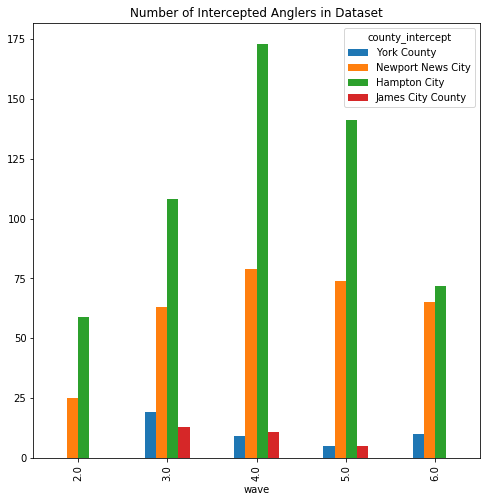

In [52]:
t.unstack(0)[['York County','Newport News City','Hampton City','James City County']].plot(kind='bar',figsize=(8, 8))
plt.title("Number of Intercepted Anglers in Dataset")
plt.show()

We can also stack data we have unstacked:

In [53]:
t_unstacked = t.unstack(0)
t_unstacked.stack()

wave  county_intercept     
2.0   Accomack County          101.0
      Chesapeake City           10.0
      Hampton City              59.0
      Isle of Wight County      17.0
      Newport News City         25.0
      Norfolk City              18.0
      Northampton County         7.0
      Virginia Beach City      382.0
      Westmoreland County        5.0
3.0   Accomack County          172.0
      Chesapeake City            8.0
      Essex County              19.0
      Gloucester County         40.0
      Hampton City             108.0
      James City County         13.0
      Mathews County            20.0
      Middlesex County          64.0
      Newport News City         63.0
      Norfolk City             125.0
      Northampton County        73.0
      Northumberland County     11.0
      Poquoson City             23.0
      Portsmouth City           31.0
      Richmond County           21.0
      Suffolk City              11.0
      Surry County               2.0
      Virg

## Pivot Table

Borrowing from excel, pandas can create pivot tables of summary statistics.  Suppose we want counties as rows and waves as columns, with the average and standard deviation of 2 and 12 month avidity.  

In [54]:
pd.pivot_table(trips_fips.loc['VA'],index='county_intercept',columns='wave',
               values=['ffdays2','ffdays12'],aggfunc=[np.mean, np.std],fill_value="-")

mean                                                \
                      ffdays12                                       ffdays2   
wave                       2.0      3.0      4.0      5.0       6.0      2.0   
county_intercept                                                               
Accomack County        21.5644  9.66279   11.116     16.7        50  2.77228   
Chesapeake City           13.9   26.625       36  23.3333   45.0303      3.2   
Essex County                 -  25.4211  60.6667        -   12.0667        -   
Gloucester County            -   23.575   44.625  49.4857   39.0625        -   
Hampton City           38.0169   22.963   27.289  21.9007   40.4583  2.74576   
Isle of Wight County   24.4706        -        -  26.7778         -        3   
James City County            -  23.4615  31.8182      4.2         -        -   
King William County          -        -  9.66667        -         -        -   
Mathews County               -    66.45  82.3333       21   21.3333        -   
Middlesex County             -  10.6094  24.9667  17.7619   24.9643        -   
Newport News City        96.88   40.873   12.519   16.473   29.1077     8.44   
Norfolk City           25.7222   23.472  14.3585  25.2449    26.075  1.77778   
Northampton County     37.2857  15.9041  14.3981  28.4082   18.4167  3.42857   
Northumberland County        -  2.18182    8.125     23.6    749.25        -   
Poquoson City                -  53.5217  34.7273       22   11.7857        -   
Portsmouth City              -  12.9677  16.6154        -     47.15        -   
Richmond County              -  14.8571        2        6         -        -   
Suffolk City                 -  7.63636  12.6154        9         -        -   
Surry County                 -        0        6     87.5         -        -   
Virginia Beach City    28.0864  29.4567  18.8908  20.0792   31.7675   2.5445   
Westmoreland County       25.4     20.6     1.25        -  0.333333        8   
York County                  -  29.9474  36.2222       11      41.5        -   

                                                                std           \
                                                           ffdays12            
wave                        3.0      4.0      5.0      6.0      2.0      3.0   
county_intercept                                                               
Accomack County          2.2907  3.52486     4.42       10    35.48  17.5116   
Chesapeake City            5.75        8  4.66667  10.0606  16.2921  34.5912   
Essex County            1.57895       12        -  2.73333        -  38.4134   
Gloucester County          4.05        8  9.74286      6.5        -   32.052   
Hampton City            3.61111  4.90751  3.42553  5.45833  131.304  97.6488   
Isle of Wight County          -        -  6.11111        -   42.891        -   
James City County       3.84615  6.63636      1.4        -        -  34.8966   
King William County           -        5        -        -        -        -   
Mathews County              7.1  11.8333      3.5      7.2        -  220.903   
Middlesex County        1.98438     5.25  4.46032  4.85714        -  15.1549   
Newport News City       1.71429  3.11392  4.48649  4.55385  272.163  175.237   
Norfolk City              2.408  3.04403  6.67347    4.875  30.9949  94.8706   
Northampton County      3.27397  4.91667  6.55102  2.53333  53.3376   24.746   
Northumberland County  0.181818    1.375      4.6     73.5        -  5.92989   
Poquoson City            7.6087  10.1818  7.83333      2.5        -  65.9345   
Portsmouth City         3.45161  5.46154        -    10.45        -  14.0866   
Richmond County               4        2     1.75        -        -  23.5548   
Suffolk City            2.72727  3.84615  4.22222        -        -  6.32887   
Surry County                  0        5       22        -        -        0   
Virginia Beach City     3.60187  3.76456  4.94428  5.53822  42.5248  91.2589   
Westmoreland County      

### Exporting Data from Pandas

You may want to export dataframes and other information to other packages (e.g. latex, excel, or stata).  Pandas has a lot of `to_` methods on pandas dataframes and series.  For example we can export some interesting information to latex table code:  

In [55]:
(t.unstack().head(25)).to_latex('excel_example.tex',na_rep='-')

In [57]:
(t.unstack().head(25)).to_excel('excel_example.xls')

## Econometrics in Python

In [58]:
import statsmodels.formula.api as smf    

# load data and create dataframe
tobias_koop=pd.read_csv('https://rlhick.people.wm.edu/econ407/data/tobias_koop_t_4.csv')

tobias_koop.head()

id  educ  ln_wage  pexp  time  ability  meduc  feduc  broken_home  \
0   4    12     2.14     2     4     0.26     12     10            1   
1   6    15     1.91     4     4     0.44     12     16            0   
2   8    13     2.32     8     4     0.51     12     15            1   
3  11    14     1.64     1     4     1.82     16     17            1   
4  12    13     2.16     6     4    -1.30     13     12            0   

   siblings  pexp2  
0         4      4  
1         2     16  
2         2     64  
3         2      1  
4         5     36

In [59]:
formula = "ln_wage ~ educ + pexp + pexp2 + broken_home"
results = smf.ols(formula,tobias_koop).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     51.36
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           1.83e-39
Time:                        15:04:02   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.137      3.353      